# Chapter 14 - Model diagnostics

In [1]:
import pandas as pd


# 14.2 Residuals

In [2]:
# let's import a dataset

housing = pd.read_csv("C:/Users/adri_/Documents/GitHub- Adriana/Pandas for everyone/data/housing_renamed.csv")
housing

,neighborhood,type,units,year_built,sq_ft,income,income_per_sq_ft,expense,expense_per_sq_ft,net_income,value,value_per_sq_ft,boro
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
2,FINANCIAL,RR-CONDOMINIUM,500,NaN,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,ROSEBANK,R4-CONDOMINIUM,52,NaN,62391,831672,13.33,326305,5.23,505367,3354003,53.76,Staten Island
2622,ARROCHAR-SHORE ACRES,R4-CONDOMINIUM,102,1987.0,90618,1274089,14.06,637045,7.03,637044,5233000,57.75,Staten Island
2623,GRANT CITY,R4-CONDOMINIUM,100,1986.0,78903,1321625,16.75,673832,8.54,647793,4687000,59.40,Staten Island
2624,GRANT CITY,R4-CONDOMINIUM,159,1961.0,166712,2343971,14.06,1171985,7.03,1171986,5967531,35.80,Staten Island


In [3]:
# We'll begin with a multiple linear regression model with three covariates

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as sm

In [4]:
# Create model(multiple linear regression)
house1 = sm.glm("value_per_sq_ft ~ units + sq_ft + boro", data = housing).fit()

# print results
house1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        value_per_sq_ft   No. Observations:                 2626
Model:                            GLM   Df Residuals:                     2619
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                          1879.5
Method:                          IRLS   Log-Likelihood:                -13621.
Date:                Fri, 14 Aug 2020   Deviance:                   4.9224e+06
Time:                        15:41:02   Pearson chi2:                 4.92e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                43.2909      5.330      8.122      0.000      32.845      53.737
boro[T.Brooklyn]         34.5621      5.535      6.244      0.000      23.714      45.411
boro[T.Manhattan]       130.9924      5.385     24.327      0.000     120.439     141.546
boro[T.Queens]           32.9937      5.663      5.827      0.000      21.895      44.092
boro[T.Staten Island]    -3.6303      9.993     -0.363      0.716     -23.216      15.956
units                    -0.1881      0.022     -8.511      0.000      -0.231      -0.145
sq_ft                     0.0002   2.09e-05     10.079      0.000       0.000       0.000
=========================================================================================
"""

In [5]:
# Let's do some plots.
import seaborn as sns
import matplotlib.pyplot as plt


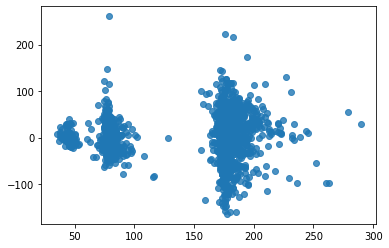

In [6]:
# Plotting the residuals using the regplot

fig, ax = plt.subplots()
ax = sns.regplot(x = house1.fittedvalues, y = house1.resid_deviance, fit_reg = False)
plt.show()


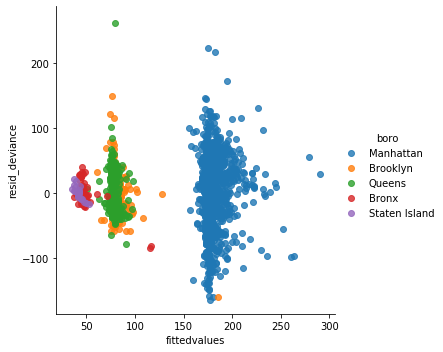

In [7]:
#Let's color the plot to see the boro variable

res_df = pd.DataFrame({"fittedvalues":house1.fittedvalues,"resid_deviance":house1.resid_deviance, "boro": housing["boro"]})

fig= sns.lmplot(x= "fittedvalues", y = "resid_deviance", data = res_df, hue = "boro", fit_reg = False)

plt.show()

# 14.2.1 Q-Q plots

In [8]:
from scipy import stats

In [9]:
# work on the variables

resid= house1.resid_deviance.copy()
resid_std = stats.zscore(resid)

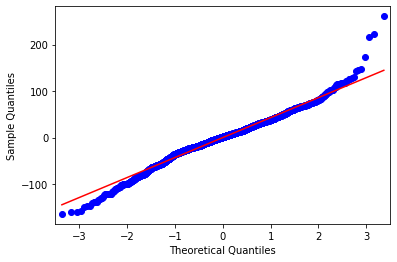

In [10]:
# Create plot ("if the blue points fall in the red line means our data match our reference distribitution")

fig=statsmodels.graphics.gofplots.qqplot(resid,line = "r")
plt.show()

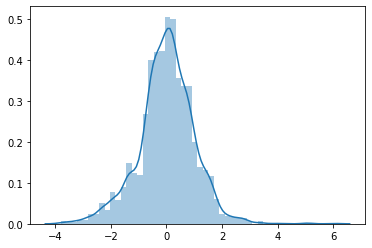

In [11]:
# we can also plot a histogram of the residuals

fig, ax = plt.subplots()
ax = sns.distplot(resid_std)
plt.show()

# 14.3 Comparing multiple models

# 14.3.1 Working with linear models 

In [12]:
# some models use the + operator to add covariates to the models and others use the * operator to indicate variables that are
# interacting and behaving not dependent of each other

f1 = "value_per_sq_ft ~ units + sq_ft + boro"
f2 = "value_per_sq_ft ~ units * sq_ft + boro"
f3 = "value_per_sq_ft ~ units + sq_ft * boro + type"
f4 = "value_per_sq_ft ~ units + sq_ft * boro + sq_ft * type"
f5 = "value_per_sq_ft ~ boro + type"


house1 = sm.ols(f1, data = housing).fit()
house2 = sm.ols(f2, data = housing).fit()
house3 = sm.ols(f3, data = housing).fit()
house4 = sm.ols(f4, data = housing).fit()
house5 = sm.ols(f5, data = housing).fit()



In [13]:
#results parameters

mod_results = pd.concat([house1.params, house2.params, house3.params, house4.params,house5.params], 
                        axis = 1).rename(columns = lambda x: "house" + str(x+1)).reset_index().rename(columns = {"index": "param"}).melt(id_vars = "param", var_name = "model", value_name = "estimate")
mod_results

,param,model,estimate
0,Intercept,house1,43.290863
1,boro[T.Brooklyn],house1,34.562150
2,boro[T.Manhattan],house1,130.992363
3,boro[T.Queens],house1,32.993674
4,boro[T.Staten Island],house1,-3.630251
...,...,...,...
85,sq_ft:boro[T.Queens],house5,NaN
86,sq_ft:boro[T.Staten Island],house5,NaN
87,sq_ft:type[T.R4-CONDOMINIUM],house5,NaN
88,sq_ft:type[T.R9-CONDOMINIUM],house5,NaN


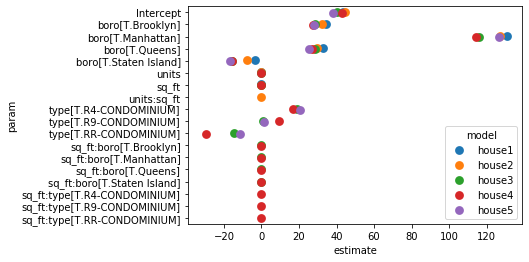

In [14]:
# Plotting the coefficients
fig, ax = plt.subplots()
ax = sns.pointplot(x = "estimate", y = "param", hue = "model", data = mod_results, dodge = True, join= False)


In [15]:
# Analysis of variance (ANOVA). It will give the residual sum of squaresm(RSS) to measure performance(the lower the better)

model_names = ["house1", "house2", "house3","house_4", "house5"]
house_anova = statsmodels.stats.anova.anova_lm(house1, house2,house3,house4,house5)
house_anova.index = model_names
house_anova

C:\Users\adri_\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\adri_\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\adri_\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
house1,2619.0,4.922389e+06,0.0,NaN,NaN,NaN
house2,2618.0,4.884872e+06,1.0,37517.437605,20.039049,7.912333e-06
house3,2612.0,4.619926e+06,6.0,264945.539994,23.585728,2.754431e-27
house_4,2609.0,4.576671e+06,3.0,43255.441192,7.701289,4.025581e-05
house5,2618.0,4.901463e+06,-9.0,-324791.847907,19.275539,NaN


# 14.3.2 Working with GLM models

In [16]:
# here the ANOVA is simply the deviance of the model

def anova_deviance_table(*models):
    return pd.DataFrame({
        "df_residuals": [i.df_resid for i in models],
        "resid_stddev": [i.deviance for i in models],
        "df": [i.df_model for i in models], 
        "deviance": [i.deviance for i in models]})


f1 = "value_per_sq_ft ~ units + sq_ft + boro"
f2 = "value_per_sq_ft ~ units * sq_ft + boro"
f3 = "value_per_sq_ft ~ units + sq_ft * boro + type"
f4 = "value_per_sq_ft ~ units + sq_ft * boro + sq_ft * type"
f5 = "value_per_sq_ft ~ boro + type"


glm1 = sm.glm(f1, data = housing).fit()
glm2 = sm.glm(f2, data = housing).fit()
glm3 = sm.glm(f3, data = housing).fit()
glm4 = sm.glm(f4, data = housing).fit()
glm5 = sm.glm(f5, data = housing).fit()


glm_anova = anova_deviance_table(glm1,glm2,glm3,glm4,glm5)
glm_anova


,df_residuals,resid_stddev,df,deviance
0,2619,4.922389e+06,6,4.922389e+06
1,2618,4.884872e+06,7,4.884872e+06
2,2612,4.619926e+06,13,4.619926e+06
3,2609,4.576671e+06,16,4.576671e+06
4,2618,4.901463e+06,7,4.901463e+06


# K-Fold Cross validation

In [17]:
# How well the model performns on new data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Let's look at our column names

housing.columns

Index(['neighborhood', 'type', 'units', 'year_built', 'sq_ft', 'income',
       'income_per_sq_ft', 'expense', 'expense_per_sq_ft', 'net_income',
       'value', 'value_per_sq_ft', 'boro'],
      dtype='object')

In [18]:
# get training and test data
X_train, X_test, y_train, y_test = train_test_split(
    pd.get_dummies(housing[["units", "sq_ft", "boro"]],
                   drop_first = True),
    housing["value_per_sq_ft"], test_size = 0.20, random_state = 42)

In [19]:
# We can get a score that indicates how well our model is performing using our test data

lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.613712528503087


In [20]:
# Since sklearn relies on numpy, we can use the patsy library. We want to use the dmatrices function

from patsy import dmatrices

In [21]:
# Code to reproduce how well our model is performing using our test data(same as above)

y, X = dmatrices("value_per_sq_ft ~ units + sq_ft + boro", housing, return_type = "dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.613712528502564


In [22]:
# to perform a k-fold cross-validation, we need to import this function  from sklearn:

from sklearn.model_selection import KFold, cross_val_score

In [23]:
# get a fresh new housing data

housing = pd.read_csv("C:/Users/adri_/Documents/GitHub- Adriana/Pandas for everyone/data/housing_renamed.csv")
housing


,neighborhood,type,units,year_built,sq_ft,income,income_per_sq_ft,expense,expense_per_sq_ft,net_income,value,value_per_sq_ft,boro
0,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
1,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
2,FINANCIAL,RR-CONDOMINIUM,500,NaN,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
3,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
4,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,ROSEBANK,R4-CONDOMINIUM,52,NaN,62391,831672,13.33,326305,5.23,505367,3354003,53.76,Staten Island
2622,ARROCHAR-SHORE ACRES,R4-CONDOMINIUM,102,1987.0,90618,1274089,14.06,637045,7.03,637044,5233000,57.75,Staten Island
2623,GRANT CITY,R4-CONDOMINIUM,100,1986.0,78903,1321625,16.75,673832,8.54,647793,4687000,59.40,Staten Island
2624,GRANT CITY,R4-CONDOMINIUM,159,1961.0,166712,2343971,14.06,1171985,7.03,1171986,5967531,35.80,Staten Island


In [24]:
# Number of folders

kf = KFold(n_splits = 5)

y, X = dmatrices("value_per_sq_ft ~ units + sq_ft + boro", housing)

In [27]:
# train and test the model on each fold

coefs = []
scores = []
for train, test in kf.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    lr = LinearRegression().fit(X_train, y_train)
    coefs.append(pd.DataFrame(lr.coef_))
    scores.append(lr.score(X_test, y_test))
    coefs_df = pd.concat(coefs)
    coefs_df.columns = X.design_info.column_names
coefs_df

,Intercept,boro[T.Brooklyn],boro[T.Manhattan],boro[T.Queens],boro[T.Staten Island],units,sq_ft
0,0.0,33.369037,129.904011,32.103100,-4.381085,-0.205890,0.000220
0,0.0,32.889925,116.957385,31.295956,-4.919232,-0.146180,0.000155
0,0.0,30.975560,141.859327,32.043449,-4.379916,-0.179671,0.000194
0,0.0,41.449196,130.779013,33.050968,-3.430209,-0.207904,0.000232
0,0.0,-38.511915,56.069855,-17.557939,0.000000,-0.145829,0.000202


In [29]:
# we can take a look at the average coeffcient across all folds using "apply" and the np.mean function

import numpy as np
coefs_df.apply(np.mean)

Intercept                  0.000000
boro[T.Brooklyn]          20.034361
boro[T.Manhattan]        115.113918
boro[T.Queens]            22.187107
boro[T.Staten Island]     -3.422088
units                     -0.177095
sq_ft                      0.000201
dtype: float64

In [30]:
# we can also look at the scores. Each model has a default scoring method. Linear regression uses the R2(coeffcient of 
# determination)

scores


[0.02731416290640731,
 -0.5538362212408723,
 -0.15636371688048145,
 -0.3234202061928868,
 -1.6929655586930985]

In [34]:
# we can also use cross_val scores

model = LinearRegression()
cross_val_score(model,X, y, cv = 5)

array([ 0.02731416, -0.55383622, -0.15636372, -0.32342021, -1.69296556])

In [40]:
# Comparing multiple models to each other by comparing the average scores

print(np.mean(scores))



-0.5398543080201863


In [46]:
# Now, we refit all our models using the k-fold cross-validation

#Create the predictor

y1, X1 = dmatrices("value_per_sq_ft ~ units + sq_ft + boro", housing)
y2, X2 = dmatrices("value_per_sq_ft ~ units * sq_ft + boro", housing)
y3, X3 = dmatrices("value_per_sq_ft ~ units + sq_ft * boro + type", housing)
y4, X4 = dmatrices("value_per_sq_ft ~ units + sq_ft * boro + sq_ft * type", housing)
y5, X5 = dmatrices("value_per_sq_ft ~ boro + type", housing)

# fit our models
LinearRegression()

scores1 = cross_val_score(model,X1,y1, cv = 5)
scores2 = cross_val_score(model,X2,y2, cv = 5)
scores3 = cross_val_score(model,X3,y3, cv = 5)
scores4 = cross_val_score(model,X4,y4, cv = 5)
scores5 = cross_val_score(model,X5,y5, cv = 5)



In [48]:
# We can now look at our cross_validation scores: We can see the Model 4 has the best perfomance.

scores_df  = pd.DataFrame([scores1, scores2, scores3, scores4, scores5])
scores_df.apply(np.mean, axis = 1)


0   -5.398543e-01
1   -1.088184e+00
2   -3.569802e+26
3   -1.109834e+27
4   -3.242427e+25
dtype: float64